# Accidentes aereos en USA

**¿Porque nos enfocamos en USA?**

Se decidió enfocar el análisis en USA, debido a que es el país que registra más visitas por trabajo o turismo a nivel mundial; además de tener la mayor cantidad de accidentes áereos (mortales)? . Vale la pena recalcar que este trabajo basa su análisis en información disponible del año 2000 al 2018, debido a los pocos datos recabados del 2019


Con el paso de los años la tecnología ha tenido gran influencia en el manejo de los datos, así como en el desarrollo de nuevas metodologías para el aprendizaje, vuelo y planeación de rutas. Podemos destacar el rediseño de las cabinas en las aeronaves y la innovación en las herramientas de vuelo como: 
 - **Piloto automatico**
 - **Sistema antcolición (TCAS)**
 - **Pantallas que muestran la información de manera más clara, con un código de colores y resaltando anomalías**



## Objetivo principal

Analizar el comportamiento de los accidentes aéreos en USA de los años 2000 al 2018, con el fin de determinar si indican un incremento en el año 2019


## Objetivos Especificos
- Definir la Taza de supervivencia anual de accidentes aéreos en USA vs la mundial 
- Determinar la Cantidad de accidentes aéreos por año en los Estados Unidos comparado con la cantidad a nivel mundial 
- Identificar los Estado(s) con mayor ocurrencia de accidentes aéreos en los Estados Unidos 
- Precisar el tipo de vuelos con mayor prevalencia de accidentes aéreos 

In [1]:
# Nedeed imports 
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import datetime as dt 
import math
from IPython.display import Markdown as mkd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib

## Proceso de Ingestion 

La ingestión de los datos se ha realizado de forma base, sin desviaciones. 

In [2]:
#Import of the dataset choosen
aircrashes = pd.read_csv("data/airplane_crashes_pf.csv")

## Analisis Estructural de los Datos

In [3]:
# Analisis estructural 
aircrashes.head(3)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...


In [4]:
#List information of the dataset
aircrashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
Date                     4967 non-null object
Time                     3457 non-null object
Location                 4963 non-null object
Operator                 4957 non-null object
Flight #                 1315 non-null object
Route                    4193 non-null object
AC Type                  4952 non-null object
Registration             4694 non-null object
cn/ln                    4299 non-null object
Aboard                   4949 non-null float64
Aboard Passangers        4738 non-null float64
Aboard Crew              4741 non-null float64
Fatalities               4959 non-null float64
Fatalities Passangers    4725 non-null float64
Fatalities Crew          4726 non-null float64
Ground                   4926 non-null float64
Summary                  4903 non-null object
dtypes: float64(7), object(10)
memory usage: 659.8+ KB


In [5]:
# Describe the numeric columns 
aircrashes.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
mean,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
std,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [6]:
# Describe the non-numeric columns 
aircrashes.describe(include=object)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Summary
count,4967,3457,4963,4957,1315,4193,4952,4694,4299,4903
unique,4539,1062,4101,2242,883,3800,2447,4661,3869,4808
top,09/11/2001,15:00,"Moscow, Russia",Aeroflot,-,Training,Douglas DC-3,49,1,Crashed under unknown circumstances.
freq,4,37,17,255,36,92,333,3,8,9


## Limpieza y Transformacion

Despues del analisis estructural se borran las columnas "Flight #" debido a su gran cantidad de datos faltantes y otras dos columnas que no aportaran nada para nuestro analisis.

Además se decide realizar las transformaciones necesarias para cambiar el índice de los datos por las columnas "Date" y "Time" 

In [7]:
# El # de vuelo tiene demasiados null por lo que no aportaria nada en el analisis. 
aircrashes = aircrashes.drop(["Flight #","cn/ln","Registration"],axis=1)

El siguiente paso en nuestra transformacion es rellenar a quellas horas que no tienen datos por un estandar de 00:00 

In [8]:
# Fill NAN times with 00:00 
aircrashes.Time.fillna("00:00",inplace=True)
aircrashes.head(2)

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...


Por último, paso para el cambio de índice, se realiza la transformación de las columnas con el uso de los métodos de Pandas para la creación de una sola columna de tipo "datetime", 
después realizándose el cambio de índice y le eliminación de las columnas viejas

In [9]:
## Unir date y time 
aircrashes["Date_time"] = pd.to_datetime(aircrashes.Date, errors='coerce')  + pd.to_timedelta(aircrashes.Time+':00', errors='coerce')
aircrashes = aircrashes.drop("Date",axis=1)
aircrashes = aircrashes.drop("Time",axis=1)
aircrashes.index = aircrashes.Date_time
aircrashes = aircrashes.drop("Date_time",axis=1)
aircrashes.head(2)

,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
Date_time,,,,,,,,,,,,
1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1909-09-07 00:00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...


Por ultimo antes de analizar los datos, cambiamos los tipos de datos acorde a su contenido para obtimizar el uso de la memoria

In [10]:
aircrashes.Aboard = aircrashes.Aboard.astype(np.float32)
aircrashes["Aboard Passangers"] = aircrashes["Aboard Passangers"].astype(np.float32)
aircrashes["Aboard Crew"] = aircrashes["Aboard Crew"].astype(np.float32)
aircrashes.Fatalities = aircrashes.Fatalities.astype(np.float32)
aircrashes["Fatalities Passangers"] = aircrashes["Fatalities Passangers"].astype(np.float32)
aircrashes["Fatalities Crew"] = aircrashes["Fatalities Crew"].astype(np.float32)
aircrashes.Ground = aircrashes.Ground.astype(np.float32)
aircrashes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4967 entries, 1908-09-17 17:18:00 to 2019-07-30 02:00:00
Data columns (total 12 columns):
Location                 4963 non-null object
Operator                 4957 non-null object
Route                    4193 non-null object
AC Type                  4952 non-null object
Aboard                   4949 non-null float32
Aboard Passangers        4738 non-null float32
Aboard Crew              4741 non-null float32
Fatalities               4959 non-null float32
Fatalities Passangers    4725 non-null float32
Fatalities Crew          4726 non-null float32
Ground                   4926 non-null float32
Summary                  4903 non-null object
dtypes: float32(7), object(5)
memory usage: 368.6+ KB


Una vez que tenemos el conjunto de datos limpio y listo para trabajar, empezamos a responder la primer pregunta que nos generan los datos

### ¿Cual es la tasa de supervivencia por año de USA y el Mundo? 

In [11]:
# Generamos la tasa de supervivencia. 
#Primero creamos una columna que tendra la cantidad de sobrevivientes
aircrashes["Survived"] = aircrashes.Aboard - aircrashes.Fatalities

# Luego generamos una columna que tendra la taza de supervivencia 
aircrashes["SR"] = round((aircrashes.Survived/aircrashes.Aboard)*100,2)

# Basandonos en una lista de Estados, creamos una funcion que asignara el nombre del estado a una columna nueva, basandose 
# en la columna location 
state=["Alabama","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia",
       "Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota",
       "Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma",
       "Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
def check(valor):
    for elem in state:
        if elem in str(valor):
            return elem
    return False

aircrashes["US_State"] = aircrashes[(aircrashes.index.year >= 2000) & (aircrashes.index.year <= 2018)].Location.apply(check)

#Filtramos los datos por fecha y ademas si son parte o no de Estados Unidos
aircrashUS = aircrashes[(aircrashes.index.year >= 2000) & (aircrashes.index.year <= 2018) & (aircrashes.US_State != False)]
aircrashWW = aircrashes[(aircrashes.index.year >= 2000) & (aircrashes.index.year <= 2018) & (aircrashes.US_State == False)]

#Sacamos los porcentajes y redondeamos a 0
srUS = round((aircrashUS.Survived.sum()/aircrashUS.Aboard.sum())*100,0)
mrUS = round((aircrashUS.Fatalities.sum()/aircrashUS.Aboard.sum())*100,0)
srWW = round((aircrashWW.Survived.sum()/aircrashUS.Aboard.sum())*100,0)
mrWW = round((aircrashWW.Fatalities.sum()/aircrashUS.Aboard.sum())*100,0)

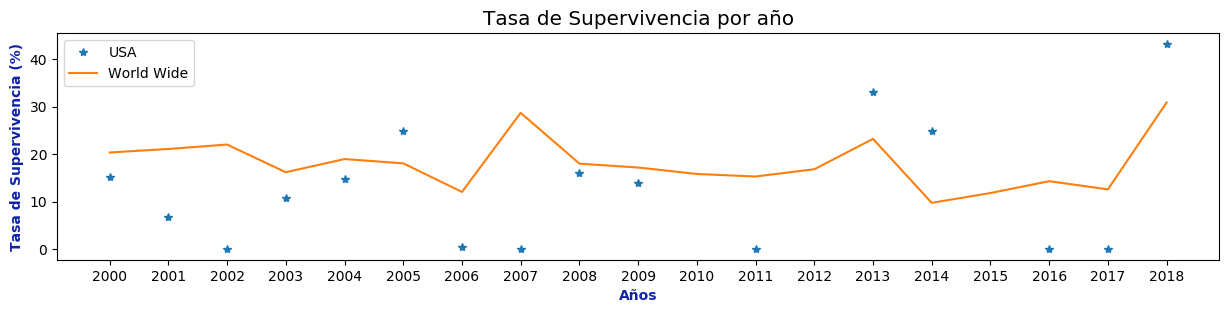

In [12]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, axes = plt.subplots(figsize=(15,3), dpi=100)
axes.set_title("Tasa de Supervivencia por año", size="x-large")
srUS_anual = aircrashUS.SR.resample('A').mean() # Aqui estamos generando lo que es la visualizacon de la taza de supervivencia anual en USA
axes.plot_date(srUS_anual.index.to_pydatetime(), srUS_anual, "*", label="USA")

# Aqui estamos generando lo que es la visualizacon de la taza de supervivencia anual en el resto del mundo
srWW_anual = aircrashes[(aircrashes.index.year >= 2000) & (aircrashes.index.year <= 2018)].SR.resample('A').mean() 
axes.plot_date(srWW_anual.index.to_pydatetime(), srWW_anual, "-", label="World Wide")
axes.xaxis.set_major_locator(mdate.YearLocator(month=12, day=31))
axes.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
axes.set_xlabel("Años", c="#0F24A8", weight="bold")
axes.set_ylabel("Tasa de Supervivencia (%)", c="#0F24A8",weight="bold")
axes.legend()
plt.show()

En la gráfica se puede apreciar que la tasa de supervivencia promedio por año en USA es bastante fluctuado, al igual que en el resto del mundo; lo que nos lleva a deducir que, a pesar de las nuevas tecnologías con el paso de los años, estas no han sido directamente influyentes en la supervivencia de las personas a bordo de las aeronaves

Por otro lado, Estados Unidos muestra una taza de supervivencia más baja que la mundial, lo que podria estar directamente relacionado a la cantidad de accidentes. A su vez, el incremento en la tasa de supervivencia, es proporcional al descenso de accidentes en el mundo como en USA.

## **¿A tenido el pasar de los años en el decremento de los accidentes?**

En el siguiente grafico vemos cual es la cantidad de accidentes por año:

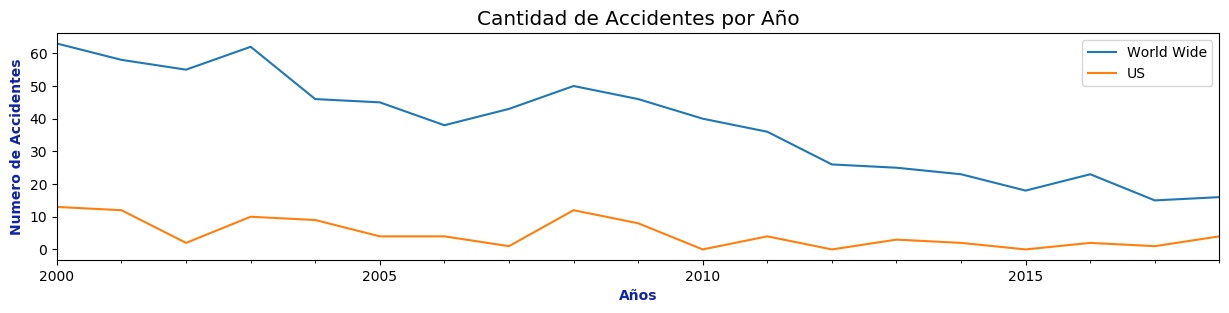

In [13]:
fig, axes = plt.subplots(figsize=(15,3),dpi=100)
ac_count = aircrashes[(aircrashes.index.year >= 2000) & (aircrashes.index.year <= 2018)].SR.resample('A').count().plot(label="World Wide")
acUS_count = aircrashUS.SR.resample('A').count().plot(label="US")
axes.set_title("Cantidad de Accidentes por Año",size="x-large")
axes.set_xlabel("Años", c="#0F24A8", weight="bold")
axes.set_ylabel("Numero de Accidentes", c="#0F24A8", weight="bold")
axes.legend()
plt.show()

Como se puede ver en el gráfico, a pesar de su fluctuación hay una tendencia generalizada el decrecimiento a nivel mundial, no obstante, en USA no se sigue la misma tendencia plana, es decir esa disminución no es tan significativa como en el resto del mundo. 

Si bien hemos analizado de la supervivencia de los pasajeros, en el siguiente grafico podemos apreciar aquellas muertes que están ligadas a un accidente aéreo mientras estaban en tierra.

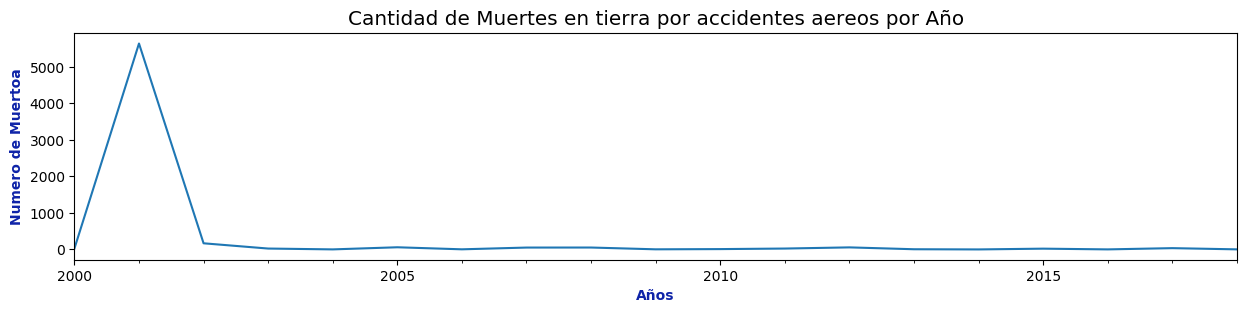

In [14]:
fig, axes = plt.subplots(figsize=(15,3),dpi=100)
ac_count = aircrashes[(aircrashes.index.year >= 2000) & (aircrashes.index.year <= 2018)].Ground.resample('A').sum().plot()
axes.set_title("Cantidad de Muertes en tierra por accidentes aereos por Año",size="x-large")
axes.set_xlabel("Años", c="#0F24A8", weight="bold")
axes.set_ylabel("Numero de Muertoa", c="#0F24A8", weight="bold")
plt.show()

Se aprecia en la gráfica que tiene una elevación de +5000 muertes en el año 2001, basado en el conocimiento que tenemos en el tema, sabemos que los datos visualizados se refieren al ataque terrorista en el 2001 a las torres "World Trade Center" en Nueva York. 

Enfocándonos ahora a un nivel más territorial.

### ¿En USA, cual es el estado(s) con más accidentes?


In [15]:
#Basandonos desde una lista que contiene todos los estados necesarios de USA, vamos a evaluar dinamicamente la data contenida en nuestro data set, 
#ya que el formato de ciudad, estado no nos aplica, hacemos las trasformaciones para evaluar de una manera mejor

state=["Alabama","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia",
       "Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota",
       "Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma",
       "Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
def check(valor):
    for elem in state:
        if elem in str(valor):
            return elem
    return False

aircrashes["US_State"] = aircrashes[(aircrashes.index.year >= 2000) & (aircrashes.index.year <= 2018)].Location.apply(check)
aircrashUS = aircrashes[(aircrashes.index.year >= 2000) & (aircrashes.index.year <= 2018) & (aircrashes.US_State != False)]
aircrashUS_counts = pd.DataFrame(aircrashUS["US_State"].value_counts())
#groupby("US_State", as_index=False).agg({"US_State":"count","Fatalities":"sum"})
#aircrashUS_counts.sort_values("US_State", ascending=False).head()

In [16]:
# Elegimos el mapa de calor a utilizar:
cmap = matplotlib.cm.get_cmap('hot_r')

# Necesitamos el total de accidentes del país:
totalcrashus = aircrashUS_counts.US_State.max()

# Usamos un data set para optener la longitud y latitud de los estados 
# de esta forma usamos para asignar labels al mapa
states = pd.read_csv("data\state_centroids.csv", index_col="state");
states.head()
lat = []
lon = []
for row in states["coordinates"]:
    latt = row.split("°N",1)[0]
    lonn = row.split("°N",1)[1]
    lon.append("-"+lonn.strip('°W \n\t'))
    lat.append(latt.strip('\n\t'))
    
states["Lon"] = pd.to_numeric(lon, downcast="float")
states["Lat"] = pd.to_numeric(lat, downcast="float")
states = states.drop("coordinates",axis=1)
#states = states.drop(["Alaska","Hawaii"])
#states.head()

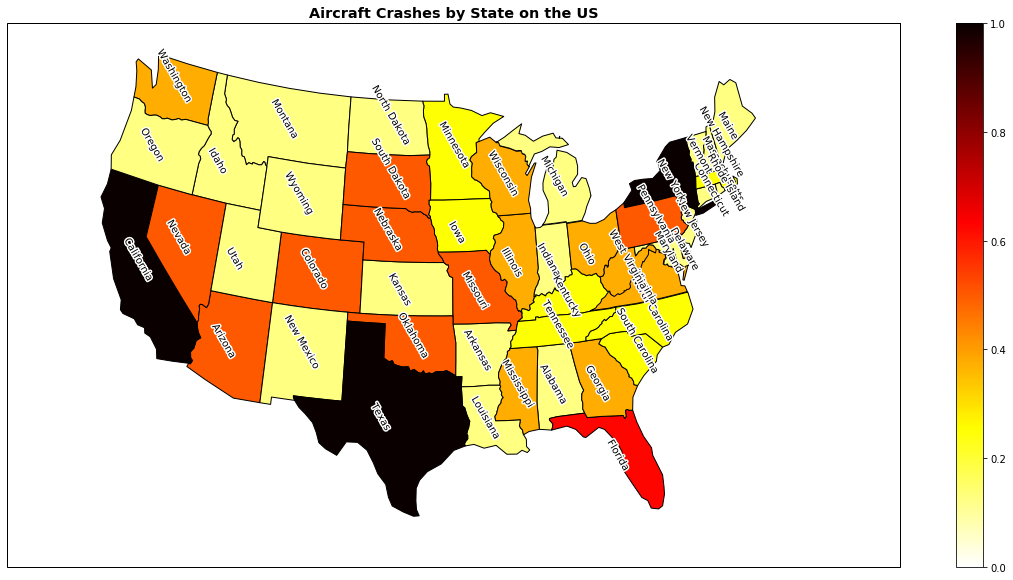

In [17]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.patheffects as path_effects

# Ocupamos el paquete shpreader:
import cartopy.io.shapereader as shpreader

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.LambertConformal())


ax.set_extent([-124, -65.5, 20, 50])

# Titulo del gráfico:
ax.set_title('Aircraft Crashes by State on the US', weight="bold", size="x-large")

# Descargamos el paquete de divisiones administrativas de nivel 1
# (Provincias, estados) de Natural Earth (solo USA)
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

# Para cada estado contenido en el archivo .shp:
for astate in shpreader.Reader(states_shp).records():
    
    # Si tenemos información del estado:
    if astate.attributes['name'] in aircrashUS_counts.index:
        # Se asigna la cantidad de accidentes = a la contenida en el dataframe
        state_count = aircrashUS_counts.loc[astate.attributes['name']].US_State
        #print(state_count)
        # Decidimos el color a asignársele a cada estado:
        color=cmap(state_count/totalcrashus, 1)

    
    # Agregamos la geometría del estado:
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black' )
    
    # Agregamos el label del estado
    us_s_lat = states.Lat[astate.attributes['name']]
    us_s_lon = states.Lon[astate.attributes['name']]
    if astate.attributes['name'] in state:
        text = plt.text(us_s_lon-1.5,us_s_lat-1, astate.attributes['name'], transform=ccrs.PlateCarree(), color="black", rotation=-60)
        text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),
                       path_effects.Normal()])  


sm = plt.cm.ScalarMappable(cmap=cmap)
plt.colorbar(sm,ax=ax)
ax.set_aspect('auto', adjustable=None)

plt.show()

El grafico nos muestra que California, Texas y NY, son los estados con más accidentes. Pero son la mayoría de accidentes, ¿Vuelos de pasajeros?

## ¿Cuáles son los tipos de vuelos con más accidentes? 

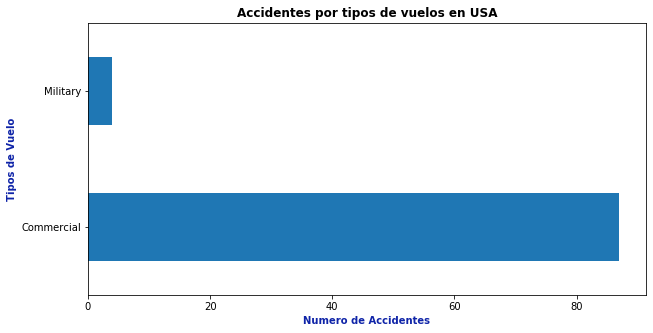

In [18]:
# Ek siguente metodo lo que hace es evaluar si dentro del valor, se encuentra alguno de estos tipos de vuelo 
# Con esto agilizamos su analizis. 

def check_type(valor):
    if "Military" in str(valor):
        return "Military"
    elif "Mail" in str(valor):
        return "Mail"
    else:
        return "Commercial"
    
flighttypes= aircrashUS.Operator.apply(check_type).value_counts().plot(kind="barh", figsize=(10,5))
flighttypes.set_title("Accidentes por tipos de vuelos en USA", weight="bold", size="large")
flighttypes.set_xlabel("Numero de Accidentes", c="#0F24A8", weight="bold")
flighttypes.set_ylabel("Tipos de Vuelo", c="#0F24A8",weight="bold")
plt.show()

El grafico confirma que los accidentes son de vuelos comerciales. 

Por ultimo podemos ver el comportamiento de los accidentes con respecto a los meses del año, lo que en un futuro podría ser analizado con las estaciones del clima. 

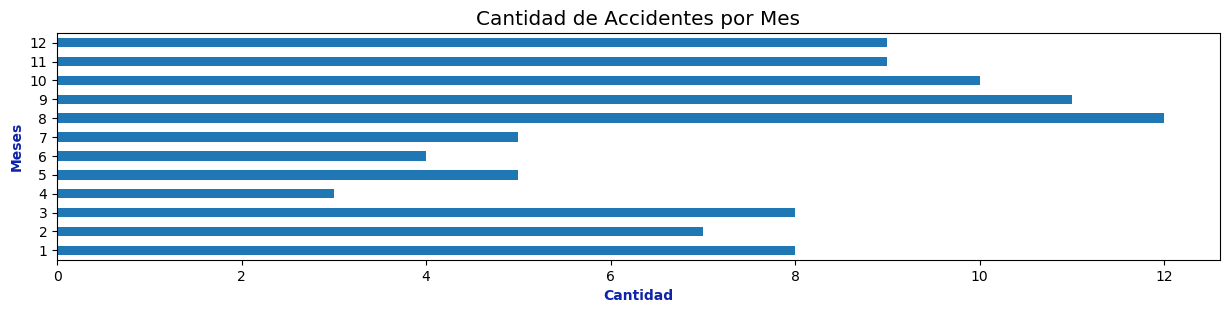

In [19]:
fig, axes = plt.subplots(figsize=(15,3),dpi=100)
aircrashUS.groupby(aircrashUS.index.month).Location.count().plot(kind="barh")
#axes.yaxis.set_major_locator(mdate.MonthLocator())
#axes.yaxis.set_major_formatter(mdate.DateFormatter('%B'))
axes.set_title("Cantidad de Accidentes por Mes",size="x-large")
axes.set_xlabel("Cantidad", c="#0F24A8", weight="bold")
axes.set_ylabel("Meses", c="#0F24A8", weight="bold")
plt.show()

Se aprecia en el grafico que el mes con más accidentes es Agosto, seguido de Septiembre, lo que podría dar indicio a un análisis más profundo, sobre el impacto de las estaciones climáticas en los accidentes aéreos.

## Conclusion

Entre los años 2000 y 2018 la tendencia de los accidentes aéreos a nivel mundial tiende a la disminución; no obstante, esta no es igual en el caso de los Estado Unidos, donde no se presenta mayor cambio. Esto sería una de las justificantes, del porque en el año 2019 la tendencia aumentara, siendo el país con mayor cantidad de accidentes aéreos a nivel mundial 
Vale la pena mencionar que en Estados Unidos también se ubica el aeropuerto más concurrido del mundo, recalcando que no es el estado con mayor cantidad de accidentes aéreos. (Atlanta, Georgia) Por otro lado, tenemos el estado de New York que cuenta con dos de los 10 aeropuertos más concurridos, y es de los que más accidentes presenta. 

Es importante recalcar que para acercarnos a una razón valida que justifique este comportamiento es necesario tener más información, debido a que hay factores que no fueron analizados en este proyecto, además de las multicausales circunstanciales de cada uno de los accidentes. 